In [22]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
          
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from itertools import combinations
from scipy import stats
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import statsmodels.tsa.ar_model as od

In [23]:
df=pd.read_excel("Thesis_dataset.xlsx",infer_date_format=True,parse_date='Date')

In [24]:
df=df.set_index('Date')

In [36]:
df=pd.get_dummies(df)
df=df.resample('W').sum()

In [37]:
df.columns

Index(['transport segment_Demanding Long Haul',
       'transport segment_Interregional Haul', 'adr adaption_ADR1',
       'adr adaption_ADR2', 'adr adaption_UADR', 'adr classification_ADRC-AT',
       'adr classification_ADRC-BAS', 'adr classification_ADRC-FL',
       'adr classification_UADRC', 'chassis height_CHH-HIGH',
       'chassis height_CHH-MED', 'dirt concentration (op envi)_DIRT-HIG',
       'dirt concentration (op envi)_DIRT-LOW',
       'dirt concentration (op envi)_DIRT-MED', 'front axle load_FAL7.1',
       'front axle load_FAL7.5', 'front axle load_FAL8.0',
       'front axle load_FAL8.5', 'front axle load_FAL9.0',
       'gross combination weight_GCW44.0', 'gross combination weight_GCW50.0',
       'gross combination weight_GCW52.0', 'gross combination weight_GCW56.0',
       'gross combination weight_GCW60.0', 'gross combination weight_GCW70.0',
       'rear axle position_RAP6540', 'rear axle position_RAP6640',
       'rear axle position_RAP6740', 'rear axle position_

In [41]:
features=[ 'adr adaption_ADR1',
       'adr adaption_ADR2', 'adr adaption_UADR', 'adr classification_ADRC-AT',
       'adr classification_ADRC-BAS', 'adr classification_ADRC-FL',
       'adr classification_UADRC', 'chassis height_CHH-HIGH',
       'chassis height_CHH-MED', 'dirt concentration (op envi)_DIRT-HIG',
       'dirt concentration (op envi)_DIRT-LOW',
       'dirt concentration (op envi)_DIRT-MED', 'front axle load_FAL7.1',
       'front axle load_FAL7.5', 'front axle load_FAL8.0',
       'front axle load_FAL8.5', 'front axle load_FAL9.0',
       'gross combination weight_GCW44.0', 'gross combination weight_GCW50.0',
       'gross combination weight_GCW52.0', 'gross combination weight_GCW56.0',
       'gross combination weight_GCW60.0', 'gross combination weight_GCW70.0',
       'rear axle position_RAP6540', 'rear axle position_RAP6640',
       'rear axle position_RAP6740', 'rear axle position_RAP6840',
       'crank case ventilation_CCV-C', 'crank case ventilation_CCV-OX',
       'centre of gravity height_COG-BAS', 'centre of gravity height_COG-HIG',
       'transport cycle_TC-CONST', 'transport cycle_TC-DISTR',
       'transport cycle_TC-LONGD', 'kitchen_LBK80F', 'kitchen_LBK80FRE',
       'kitchen_LBK80FRM', 'kitchen_LBK90FX', 'wheelbase_WB3500',
       'wheelbase_WB3600', 'wheelbase_WB3700', 'wheelbase_WB3800',
       'lower cabinet_CSPU-SDR', 'lower cabinet_CSPU-SS',
       'phone cabin_PHONE-PK', 'phone cabin_UPHONE']
target=['transport segment_Interregional Haul']

X=df.drop('transport segment_Interregional Haul',axis=1)
df_target=df[target].copy()
df_features=df[features].copy()

In [44]:
rfc1 = RandomForestRegressor(random_state=42)
rfc1.fit(df_features,df_target)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [45]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rfc1, random_state=1).fit(df_features,df_target )
data=eli5.show_weights(perm, feature_names = df_features.columns.tolist(),top=100)
data

Weight,Feature
0.7946 ± 0.1024,gross combination weight_GCW50.0
0.0512 ± 0.0118,adr classification_ADRC-BAS
0.0504 ± 0.0106,kitchen_LBK80FRM
0.0387 ± 0.0074,front axle load_FAL7.1
0.0348 ± 0.0104,lower cabinet_CSPU-SDR
0.0339 ± 0.0162,lower cabinet_CSPU-SS
0.0298 ± 0.0175,dirt concentration (op envi)_DIRT-MED
0.0258 ± 0.0025,phone cabin_PHONE-PK
0.0246 ± 0.0079,chassis height_CHH-HIGH
0.0231 ± 0.0126,crank case ventilation_CCV-C


To check whether the series is stationary or not

In [7]:
#ADF Test
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    print( "If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).")
#apply adf test on the series
adf_test(df['transport segment_Interregional Haul'])  

Results of Dickey-Fuller Test:
Test Statistic                -7.725757e+00
p-value                        1.160259e-11
#Lags Used                     0.000000e+00
Number of Observations Used    6.200000e+01
Critical Value (1%)           -3.540523e+00
Critical Value (5%)           -2.909427e+00
Critical Value (10%)          -2.592314e+00
dtype: float64
If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).


In [8]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    print(" If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, we fail to reject the null hypothesis (series is stationary).")
kpss_test(df['transport segment_Interregional Haul'])  

Results of KPSS Test:
Test Statistic            0.511601
p-value                   0.039054
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
 If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, we fail to reject the null hypothesis (series is stationary).


In [9]:
#transformation

In [10]:
#differencing
df['diff_transport segment_Interregional Haul'] = df['transport segment_Interregional Haul'] - df['transport segment_Interregional Haul'].shift(1)

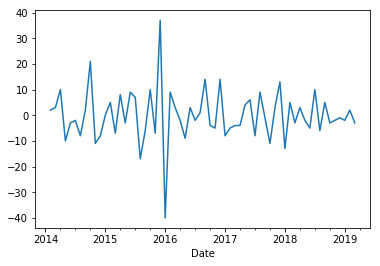

In [11]:
ts1=df['diff_transport segment_Interregional Haul'].dropna()
df['diff_transport segment_Interregional Haul'].dropna().plot()

In [12]:
adf_test(df['dirt concentration (op envi)_DIRT-LOW'])  

Results of Dickey-Fuller Test:
Test Statistic                 -5.389628
p-value                         0.000004
#Lags Used                      5.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).


In [13]:
kpss_test(df['dirt concentration (op envi)_DIRT-LOW'])  
#ts2=df['dirt concentration (op envi)_DIRT-LOW']

Results of KPSS Test:
Test Statistic            0.143055
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
 If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, we fail to reject the null hypothesis (series is stationary).


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [14]:
#Differencing
#df['diff_dirt concentration (op envi)_DIRT-LOW'] = df['dirt concentration (op envi)_DIRT-LOW'] - df['dirt concentration (op envi)_DIRT-LOW'].shift(1)
ts2=df['dirt concentration (op envi)_DIRT-HIG']
ts3=df['transport segment_Interregional Haul']

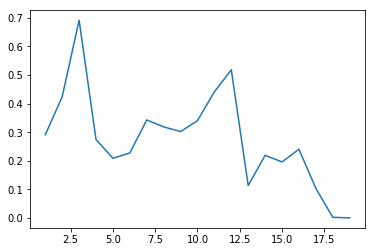

In [15]:
df1 = pd.concat((ts3, ts2), axis='columns').dropna()

result = ts.grangercausalitytests(df1, maxlag=19, verbose=False)
p_values = pd.Series({k:v[0]['lrtest'][1] for k,v in result.items()})

p_values.plot.line()

In [16]:
df.columns

Index(['transport segment_Demanding Long Haul',
       'transport segment_Interregional Haul', 'adr adaption_ADR1',
       'adr adaption_ADR2', 'adr adaption_UADR', 'adr classification_ADRC-AT',
       'adr classification_ADRC-BAS', 'adr classification_ADRC-FL',
       'adr classification_UADRC', 'chassis height_CHH-HIGH',
       'chassis height_CHH-MED', 'dirt concentration (op envi)_DIRT-HIG',
       'dirt concentration (op envi)_DIRT-LOW',
       'dirt concentration (op envi)_DIRT-MED', 'front axle load_FAL7.1',
       'front axle load_FAL7.5', 'front axle load_FAL8.0',
       'front axle load_FAL8.5', 'front axle load_FAL9.0',
       'gross combination weight_GCW44.0', 'gross combination weight_GCW50.0',
       'gross combination weight_GCW52.0', 'gross combination weight_GCW56.0',
       'gross combination weight_GCW60.0', 'gross combination weight_GCW70.0',
       'rear axle position_RAP6540', 'rear axle position_RAP6640',
       'rear axle position_RAP6740', 'rear axle position_

In [17]:
df_features= df.drop( 'transport segment_Interregional Haul',axis=1)
df_target=df[['transport segment_Interregional Haul']]

In [18]:
df_features

,transport segment_Demanding Long Haul,adr adaption_ADR1,adr adaption_ADR2,adr adaption_UADR,adr classification_ADRC-AT,adr classification_ADRC-BAS,adr classification_ADRC-FL,adr classification_UADRC,chassis height_CHH-HIGH,chassis height_CHH-MED,...,kitchen_LBK90FX,wheelbase_WB3500,wheelbase_WB3600,wheelbase_WB3700,wheelbase_WB3800,lower cabinet_CSPU-SDR,lower cabinet_CSPU-SS,phone cabin_PHONE-PK,phone cabin_UPHONE,diff_transport segment_Interregional Haul
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,194.0,2.0,20.0,180.0,0.0,2.0,20.0,180.0,23.0,179.0,...,15.0,0.0,9.0,109.0,84.0,26.0,176.0,75.0,127.0,NaN
2014-02-28,286.0,0.0,28.0,268.0,0.0,0.0,28.0,268.0,14.0,282.0,...,0.0,0.0,4.0,128.0,164.0,61.0,235.0,97.0,199.0,2.0
2014-03-31,271.0,0.0,14.0,270.0,0.0,2.0,12.0,270.0,19.0,265.0,...,9.0,0.0,7.0,165.0,112.0,58.0,226.0,80.0,204.0,3.0
2014-04-30,231.0,2.0,30.0,222.0,0.0,0.0,32.0,222.0,21.0,233.0,...,1.0,0.0,4.0,160.0,90.0,65.0,189.0,46.0,208.0,10.0
2014-05-31,283.0,0.0,25.0,271.0,0.0,0.0,25.0,271.0,22.0,274.0,...,0.0,0.0,6.0,208.0,82.0,40.0,256.0,78.0,218.0,-10.0
2014-06-30,286.0,1.0,14.0,281.0,0.0,1.0,14.0,281.0,25.0,271.0,...,0.0,0.0,8.0,120.0,168.0,30.0,266.0,123.0,173.0,-3.0
2014-07-31,181.0,1.0,16.0,172.0,0.0,0.0,17.0,172.0,20.0,169.0,...,0.0,0.0,2.0,99.0,88.0,28.0,161.0,48.0,141.0,-2.0
2014-08-31,199.0,1.0,18.0,180.0,0.0,0.0,19.0,180.0,8.0,191.0,...,1.0,0.0,2.0,102.0,95.0,22.0,177.0,48.0,151.0,-8.0
2014-09-30,253.0,0.0,58.0,197.0,0.0,19.0,39.0,197.0,14.0,241.0,...,0.0,0.0,4.0,105.0,146.0,45.0,210.0,87.0,168.0,2.0


In [19]:
df_target

,transport segment_Interregional Haul
Date,
2014-01-31,8.0
2014-02-28,10.0
2014-03-31,13.0
2014-04-30,23.0
2014-05-31,13.0
2014-06-30,10.0
2014-07-31,8.0
2014-08-31,0.0
2014-09-30,2.0


In [21]:
rfc1 = RandomForestRegressor(random_state=42)
rfc1.fit(df_features,df_target)
feature_importances = pd.DataFrame(rfc1.feature_importances_,
                                   index = df_features.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').